## TRẦN THỊ NGỌC TRINH - K214142094


### DỮ LIỆU GIÁ VÀ VOLUME

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.graph_objs as go
import ta
import tkinter as tk
from tkinter import Entry, Label, Button
from tkinter import ttk
from plotly.subplots import make_subplots
# Đọc sheet Price từ tệp Excel
sheet_name = 'Price'
Price = pd.read_excel("Price-Vol VN 2015-2023.xlsx", sheet_name=sheet_name)
mask_PVT = Price['Code'].str.contains('PVT', na=False)
PVT_Price = Price[mask_PVT]
PVTPrice = PVT_Price.transpose()
PVTPrice = PVTPrice.iloc[3:]

PVTPrice.columns = ['price']
PVTPrice= PVTPrice.reset_index()
PVTPrice= PVTPrice.rename(columns={'index': 'date'})
df1=PVTPrice

# Đọc sheet Volume từ tệp Excel
sheet_name = 'Volume'
Volume= pd.read_excel("Price-Vol VN 2015-2023.xlsx", sheet_name=sheet_name)
PVT = Volume['Code'].str.contains('PVT', na=False)
PVT_Volume = Volume[PVT]
PVT_Volume= PVT_Volume.transpose()
PVT_Volume = PVT_Volume.iloc[3:]

PVT_Volume.columns = ['volume']
PVT_Volume= PVT_Volume.reset_index()
PVT_Volume= PVT_Volume.rename(columns={'index': 'date'})
df=PVT_Volume. copy()
df['price']=df1['price'] 
df = df.dropna()
df

,date,volume,price
2,2015-01-05,3256.9,10750.97
3,2015-01-06,3200.7,11067.18
4,2015-01-07,2630.1,10988.13
5,2015-01-08,2181.4,10830.02
6,2015-01-09,2462.4,11067.18
...,...,...,...
2303,2023-10-31,9215.9,21950.0
2304,2023-11-01,5277.5,23000.0
2305,2023-11-02,7061.5,24350.0
2306,2023-11-03,7312.1,23800.0


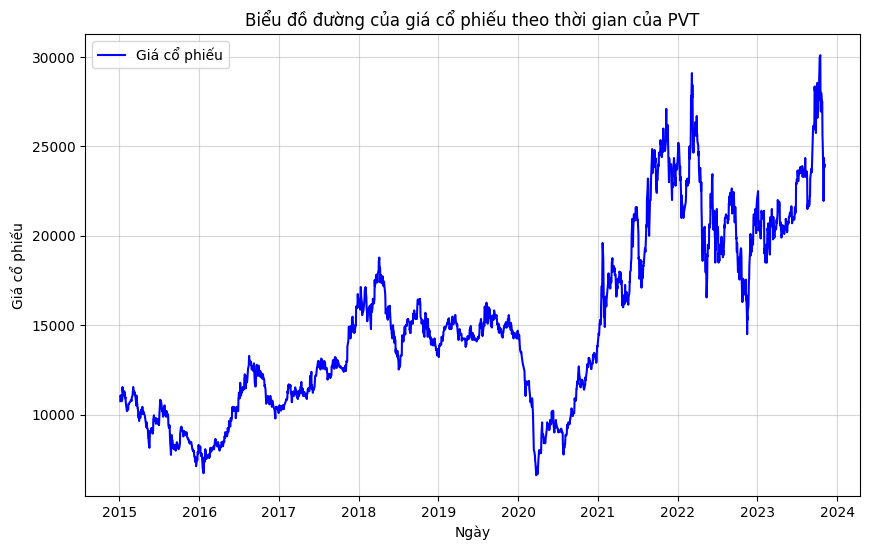

In [29]:
# Biểu đồ đường của giá cổ phiếu theo thời gian của PVT
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['price'], label='Giá cổ phiếu', color='blue')
plt.grid(True, alpha=0.5)
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ đường của giá cổ phiếu theo thời gian của PVT')
plt.legend()

# Hiển thị biểu đồ
plt.show()



In [30]:
# Vẽ biểu ồ giá của PVT


df['date'] = pd.to_datetime(df['date'])

# Tạo biểu đồ với plotly
fig = go.Figure()

# Thêm dữ liệu vào biểu đồ
fig.add_trace(go.Scatter(x=df['date'], y=df['price'], mode='lines', name='Giá'))

# Đặt tiêu đề và nhãn trục
fig.update_layout(title='Biểu Đồ Giá', xaxis_title='Ngày', yaxis_title='Giá')

# Hiển thị biểu đồ
fig.show()


In [31]:


# Tìm vị trí có giá cao nhất và giá thấp nhất
max_price_date = df.loc[df['price'].idxmax(), 'date']
max_price = df['price'].max()

min_price_date = df.loc[df['price'].idxmin(), 'date']
min_price = df['price'].min()

# Tạo biểu đồ với plotly
fig = go.Figure()

# Thêm dữ liệu vào biểu đồ
fig.add_trace(go.Scatter(x=df['date'], y=df['price'], mode='lines', name='Giá'))

# Thêm điểm và chú thích cho giá cao nhất và thấp nhất
fig.add_trace(go.Scatter(x=[max_price_date, min_price_date], y=[max_price, min_price],
                         mode='markers', marker=dict(color='red', size=10),
                         name='Vị trí cực đại/cực tiểu'))

fig.add_annotation(
    x=max_price_date, y=max_price,
    text=f'Max: {max_price}',
    showarrow=True,
    arrowhead=7,
    ax=0,
    ay=-40
)

fig.add_annotation(
    x=min_price_date, y=min_price,
    text=f'Min: {min_price}',
    showarrow=True,
    arrowhead=7,
    ax=0,
    ay=40
)

# Đặt tiêu đề và nhãn trục
fig.update_layout(title='Biểu Đồ Giá', xaxis_title='Ngày', yaxis_title='Giá')

# Hiển thị biểu đồ
fig.show()


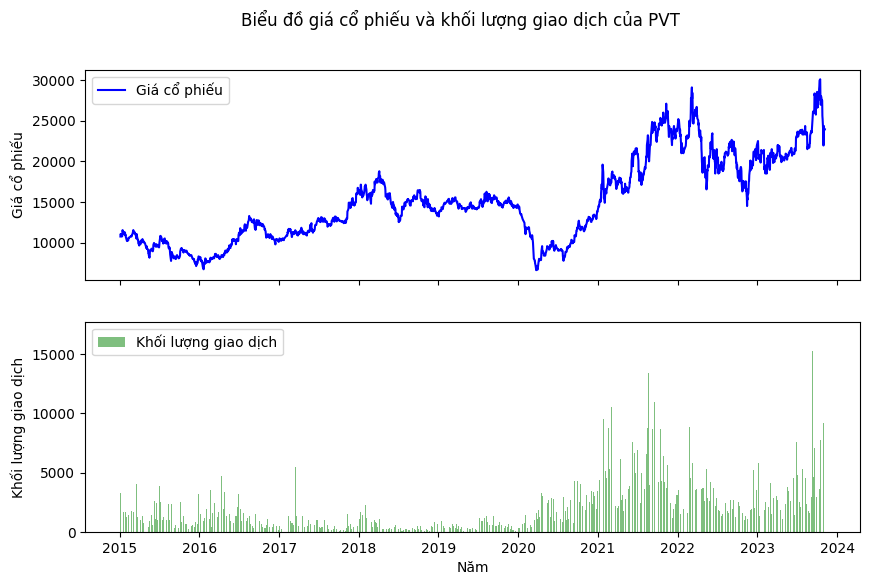

In [32]:

# Tạo nhiều khung con (subplots)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)

# Vẽ biểu đồ đường của giá cổ phiếu trong khung đầu tiên
ax[0].plot(df['date'], df['price'], label='Giá cổ phiếu', color='blue')
ax[0].set_ylabel('Giá cổ phiếu')
ax[0].legend()

# Vẽ biểu đồ khối lượng giao dịch trong khung thứ hai
ax[1].bar(df['date'], df['volume'], color='green', alpha=0.5, label='Khối lượng giao dịch')
ax[1].set_ylabel('Khối lượng giao dịch')
ax[1].legend()

# Đặt tiêu đề chung cho toàn bộ biểu đồ
plt.suptitle('Biểu đồ giá cổ phiếu và khối lượng giao dịch của PVT')

# Hiển thị biểu đồ
plt.xlabel('Năm')
plt.show()


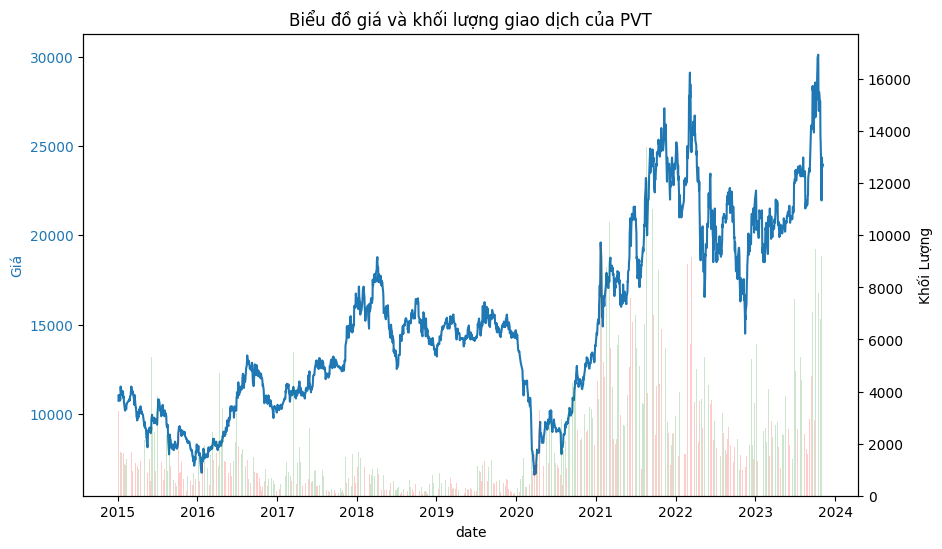

In [33]:

# Kiểm tra và loại bỏ dữ liệu lỗi
df = df.dropna(subset=['date'])  # Loại bỏ dòng có ngày không hợp lệ (nếu có)

# Sắp xếp lại DataFrame theo ngày
df = df.sort_values(by='date')

# Vẽ biểu đồ khối lượng giao dịch
fig, ax1 = plt.subplots(figsize=(10, 6))

# Biểu đồ đường giá (trục y bên trái)
color = 'tab:blue'
ax1.set_xlabel('date')
ax1.set_ylabel('Giá', color=color)
ax1.plot(df['date'], df['price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Tạo trục y thứ hai để vẽ biểu đồ khối lượng giao dịch (trục y bên phải)
ax2 = ax1.twinx()
ax2.set_ylabel('Khối Lượng', color='black')

# Tô màu cho biểu đồ khối lượng giao dịch (xanh cho tăng, đỏ cho giảm)
colors = ['green' if volume_up else 'red' for volume_up in df['volume'].diff() > 0]
ax2.bar(df['date'], df['volume'], color=colors, alpha=0.2,linewidth=0)

# Định dạng đồ thị
plt.title('Biểu đồ giá và khối lượng giao dịch của PVT')
plt.show()


#### Mã các chứng khoán cùng ngành

In [34]:
# Danh sách các kí tự cần lọc
ky_tu_can_loc = ['VTO', 'PVT', 'PJT', 'VIP']
# Lọc DataFrame
filtered_Price = Price[Price['Code'].str.contains('|'.join(ky_tu_can_loc), na=False)]

# Trích xuất phần text giữa "VT:" và "(P)"
filtered_Price['Name'] = filtered_Price['Code'].str.extract(r'VT:(.*?)\(P\)')

# Sử dụng cột 'Name' làm index
filtered_Price.set_index('Name', inplace=True)
filtered_Price.drop(columns=['Code'], inplace=True)

filtered_Price= filtered_Price.transpose()
filtered_Price = filtered_Price.iloc[3:]
# Đưa tên của hàng thành một cột 'date'
filtered_Price.reset_index(inplace=True)

# Đổi tên cột 'Name' thành 'date'
filtered_Price.rename(columns={'index': 'date'}, inplace=True)
filtered_Price.columns.name = None
filtered_Price


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12732\4241087146.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12732\4241087146.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,PJT,PVT,VIP,VTO
0,2015-01-02,7219.76,11067.18,12149.54,8400.0
1,2015-01-05,7307.8,10750.97,11962.62,8300.0
2,2015-01-06,7307.8,11067.18,12710.29,8700.0
3,2015-01-07,7307.8,10988.13,12897.2,8800.0
4,2015-01-08,7307.8,10830.02,12710.29,8800.0
...,...,...,...,...,...
2302,2023-10-31,10200.0,21950.0,10350.0,8600.0
2303,2023-11-01,9510.0,23000.0,10450.0,8600.0
2304,2023-11-02,9610.0,24350.0,10750.0,8940.0
2305,2023-11-03,10250.0,23800.0,10750.0,8940.0


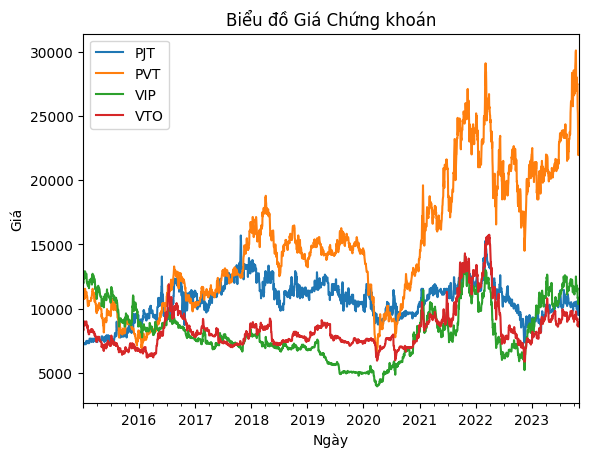

In [35]:
# Chuyển cột 'date' thành kiểu dữ liệu datetime
filtered_Price['date'] = pd.to_datetime(filtered_Price['date'])

# Đặt 'date' làm index để vẽ biểu đồ theo thời gian
filtered_Price.set_index('date', inplace=True)

# Tạo đối tượng figure và axes
fig, ax = plt.subplots()

# Vẽ biểu đồ
filtered_Price.plot(kind='line', ax=ax)

# Đặt tên cho các trục và tiêu đề
ax.set_title('Biểu đồ Giá Chứng khoán')
ax.set_xlabel('Ngày')
ax.set_ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

### Báo cáo tài chính 5 năm

In [36]:

#file 2021
bctc2018 = pd.read_excel("2021-Vietnam.xlsx", skiprows=7, header=1)
bctc2018= bctc2018.iloc[:, 1:]
bctc2018.index = [2018] * len(bctc2018)
for i in range (len(bctc2018.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2018\n" in bctc2018.columns[i]:
    bctc2018.columns = bctc2018.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2018\n", " ")
PVTbctc2018 = bctc2018[bctc2018['Mã'].str.contains('PVT', case=False, na=False)]


# file 2020
bctc2019 = pd.read_excel("2020-Vietnam.xlsx", skiprows=7, header=1)
bctc2019 = bctc2019.iloc[:, 1:]
bctc2019.index = [2019] * len(bctc2019)
for i in range (len(bctc2019.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2019\n" in bctc2019.columns[i]:
   bctc2019.columns = bctc2019.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2019\n", " ")
PVTbctc2019 = bctc2019[bctc2019['Mã'].str.contains('PVT', case=False, na=False)]



#file 2019
bctc2020 = pd.read_excel("2019-Vietnam.xlsx", skiprows=7, header=1)
bctc2020 = bctc2020.iloc[:, 1:]
bctc2020.index = [2020] * len(bctc2020)
for i in range (len(bctc2020.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2020\n" in bctc2020.columns[i]:
    bctc2020.columns = bctc2020.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2020\n", " ")
PVTbctc2020 = bctc2020[bctc2020['Mã'].str.contains('PVT', case=False, na=False)]



#file 2018
bctc2021 = pd.read_excel("2018-Vietnam.xlsx", skiprows=7,header=1)
bctc2021= bctc2021.iloc[:, 1:]
bctc2021.index = [2021] * len(bctc2021)
for i in range (len(bctc2021.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2021\n" in bctc2021.columns[i]:
   bctc2021.columns = bctc2021.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2021\n", " ")
PVTbctc2021 = bctc2021[bctc2021['Mã'].str.contains('PVT', case=False, na=False)]



#file 2022
bctc2022 = pd.read_excel("2022-Vietnam.xlsx", skiprows=7, header=1)
bctc2022 = bctc2022.iloc[:, 1:]
bctc2022.index = [2022] * len(bctc2022)
for i in range (len(bctc2022.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2022\n" in bctc2022.columns[i]:
    bctc2022.columns = bctc2022.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2022\n", " ")
PVTbctc2022 = bctc2022[bctc2022['Mã'].str.contains('PVT', case=False, na=False)]
data= pd.concat([PVTbctc2018, PVTbctc2019, PVTbctc2020, PVTbctc2021, PVTbctc2022])
bctc= pd.concat([bctc2018, bctc2019, bctc2020, bctc2021, bctc2022])



data = data.rename(columns={'Năm ': 'year'})
bctc=bctc.rename(columns={'Năm ': 'year'})
data.dropna(axis = 1,inplace = True)
data = data.fillna(0)
BCTC=bctc. copy()
df1=data.copy()

In [37]:
df1

,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,year,Trạng thái kiểm toán,...,TM. Chi phí tài chính khác Đơn vị: Triệu VND,TM. Chi phí sản xuất theo yếu tố Đơn vị: Triệu VND,"TM. Chi phí nguyên liệu, vật liệu Đơn vị: Triệu VND",TM. Chi phí nhân công Đơn vị: Triệu VND,TM.Chi phí khấu hao tài sản cố định Đơn vị: Triệu VND,TM. Chi phí dịch vụ mua ngoài Đơn vị: Triệu VND,TM. Chi phí khác bằng tiền Đơn vị: Triệu VND,BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND,BCTCKH. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND
2018,PVT,Vận tải Dầu khí PVTrans,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2018.0,Chưa kiểm toán,...,1.472648e+10,4.469678e+12,8.463357e+11,5.662059e+11,5.995267e+11,2.177657e+12,2.799530e+11,5.500000e+12,5.000000e+11,4.000000e+11
2019,PVT,Vận tải Dầu khí PVTrans,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2019.0,Chưa kiểm toán,...,1.274174e+09,4.972695e+12,1.371134e+12,6.530470e+11,7.497222e+11,1.308305e+12,8.904860e+11,6.200000e+12,5.500000e+11,4.330000e+11
2020,PVT,Vận tải Dầu khí PVTrans,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2020.0,Chưa kiểm toán,...,0.000000e+00,5.395213e+12,1.422793e+12,8.066751e+11,8.772871e+11,1.475754e+12,8.127045e+11,6.000000e+12,5.000000e+11,4.040000e+11
2021,PVT,Vận tải Dầu khí PVTrans,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2021.0,Chưa kiểm toán,...,4.894777e+08,5.829602e+12,1.374234e+12,7.785142e+11,9.297456e+11,2.350792e+12,3.963166e+11,6.500000e+12,6.000000e+11,4.800000e+11
2022,PVT,Vận tải Dầu khí PVTrans,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2022.0,Chưa kiểm toán,...,2.649721e+09,6.654747e+12,1.614450e+12,1.027215e+12,1.195322e+12,2.410237e+12,4.075232e+11,6.800000e+12,6.800000e+11,5.380000e+11


In [38]:
import plotly.express as px

df1['year'] = pd.to_datetime(df1['year'], format='%Y')  # Chuyển đổi sang kiểu dữ liệu datetime
df1['year'] = df1['year'].dt.year

# Sử dụng Plotly Express để vẽ biểu đồ cột tương tác
fig = px.bar(df1, x='year', y=['KQKD. Doanh thu thuần Đơn vị: Triệu VND', 'KQKD. Lợi nhuận thuần từ hoạt động kinh doanh Đơn vị: Triệu VND'],
             labels={'value': 'Số liệu (Triệu VND)', 'variable': 'Loại'}, title='Biểu đồ Doanh thu và Lợi nhuận (2018-2022)')

# Tùy chỉnh hiển thị đơn vị khi di chuyển chuột qua
fig.update_layout(hovermode='x unified', hoverlabel=dict(bgcolor="white", font_size=16, font_family="Arial"))

# Hiển thị biểu đồ
fig.show()

In [39]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df1['Biên Lợi Nhuận Ròng'] = (df1['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'] /
                             df1['KQKD. Doanh thu thuần Đơn vị: Triệu VND'])
df1['Biên Lợi Nhuận Ròng'] 
# Tạo biểu đồ
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Vẽ cột doanh thu và lợi nhuận ròng
fig.add_trace(go.Bar(
    x=df1['year'],
    y=df1['KQKD. Doanh thu thuần Đơn vị: Triệu VND'],
    name='Doanh Thu',
    marker_color='blue',
), secondary_y=False)

fig.add_trace(go.Bar(
    x=df1['year'],
    y=df1['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'],
    name='Lợi Nhuận Ròng',
    marker_color='green',
    opacity=0.7,
), secondary_y=False)

# Vẽ đường biên lợi nhuận ròng
fig.add_trace(go.Scatter(
    x=df1['year'],
    y=df1['Biên Lợi Nhuận Ròng'],
    mode='lines+markers',
    name='Biên Lợi Nhuận Ròng',
    line=dict(color='red', width=2),
), secondary_y=True)

# Tùy chỉnh layout
fig.update_layout(
    title='Biểu Đồ Doanh Thu, Lợi Nhuận Ròng và Biên Lợi Nhuận Ròng Theo Năm',
    xaxis_title='Năm',
    yaxis_title='Giá trị',
    barmode='group',  # Tạo biểu đồ cột nhóm
    legend=dict(x=0, y=1.1, traceorder='normal'),  # Vị trí chú thích
)

# Hiển thị biểu đồ
fig.show()


In [41]:

df_melted = pd.melt(df1, id_vars=['year'], value_vars=['CĐKT. TÀI SẢN DÀI HẠN Đơn vị: Triệu VND', 'CĐKT. TÀI SẢN NGẮN HẠN Đơn vị: Triệu VND'], var_name='asset_type', value_name='value')


fig = px.bar(df_melted, x='year', y='value', color='asset_type', hover_data=['value'], labels={'value': 'Triệu VND'}, title='TÀI SẢN DÀI HẠN và NGẮN HẠN qua từng năm của PVT')
fig.update_layout(xaxis_title='Năm', yaxis_title='Triệu VND')

# Show the plot
fig.show()


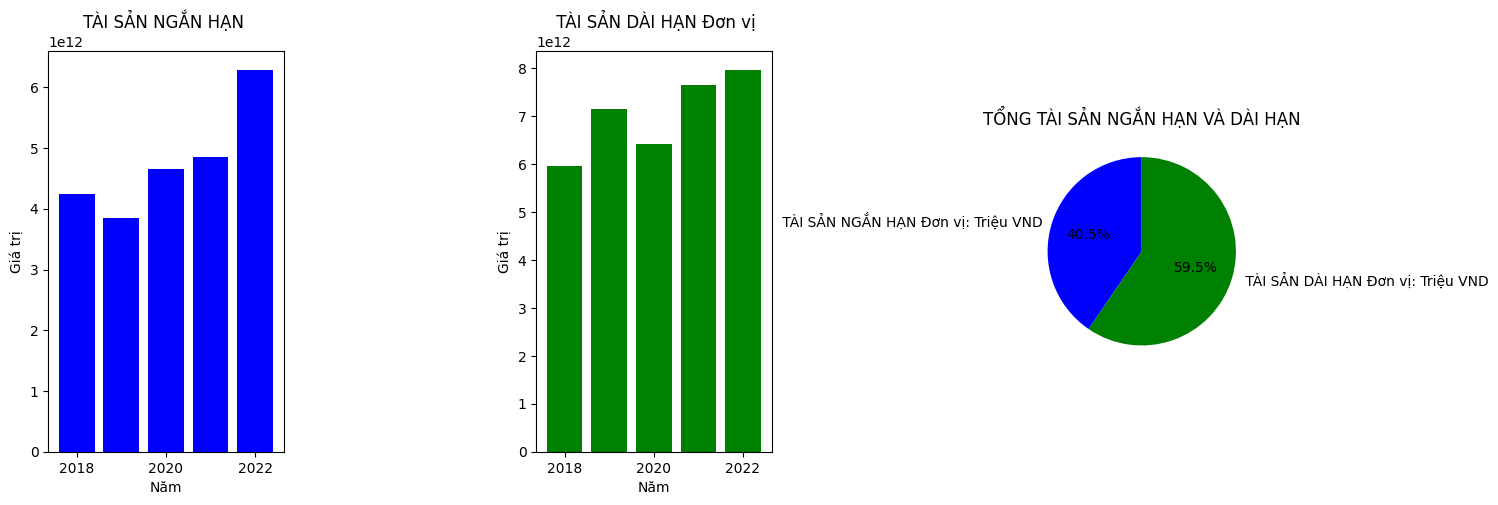

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors

# Tạo subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Biểu đồ cột CĐKT. TÀI SẢN NGẮN HẠN
bars1 = ax1.bar(df1['year'], df1['CĐKT. TÀI SẢN NGẮN HẠN Đơn vị: Triệu VND'], color='blue')
ax1.set_title('TÀI SẢN NGẮN HẠN ')
ax1.set_xlabel('Năm')
ax1.set_ylabel('Giá trị')

# Biểu đồ cột CĐKT. TÀI SẢN DÀI HẠN
bars2 = ax2.bar(df1['year'], df1[ 'CĐKT. TÀI SẢN DÀI HẠN Đơn vị: Triệu VND'], color='green')
ax2.set_title(' TÀI SẢN DÀI HẠN Đơn vị')
ax2.set_xlabel('Năm')
ax2.set_ylabel('Giá trị')

# Vòng tròn thể hiện CĐKT. TÀI SẢN DÀI HẠN, CĐKT. TÀI SẢN NGẮN HẠN
total_ngan_han = df1['CĐKT. TÀI SẢN NGẮN HẠN Đơn vị: Triệu VND'].sum()
total_dai_han = df1[ 'CĐKT. TÀI SẢN DÀI HẠN Đơn vị: Triệu VND'].sum()
labels_pie = [' TÀI SẢN NGẮN HẠN Đơn vị: Triệu VND', ' TÀI SẢN DÀI HẠN Đơn vị: Triệu VND']
sizes_pie = [total_ngan_han, total_dai_han]

pie = ax3.pie(sizes_pie, labels=labels_pie, autopct='%1.1f%%', colors=['blue', 'green'], startangle=90)
ax3.set_title('TỔNG TÀI SẢN NGẮN HẠN VÀ DÀI HẠN')

# Thêm tương tác cho biểu đồ cột
mplcursors.cursor(bars1, hover=True).connect('add', lambda sel: sel.annotation.set_text(f"{sel.target[1]}"))
mplcursors.cursor(bars2, hover=True).connect('add', lambda sel: sel.annotation.set_text(f"{sel.target[1]}"))

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

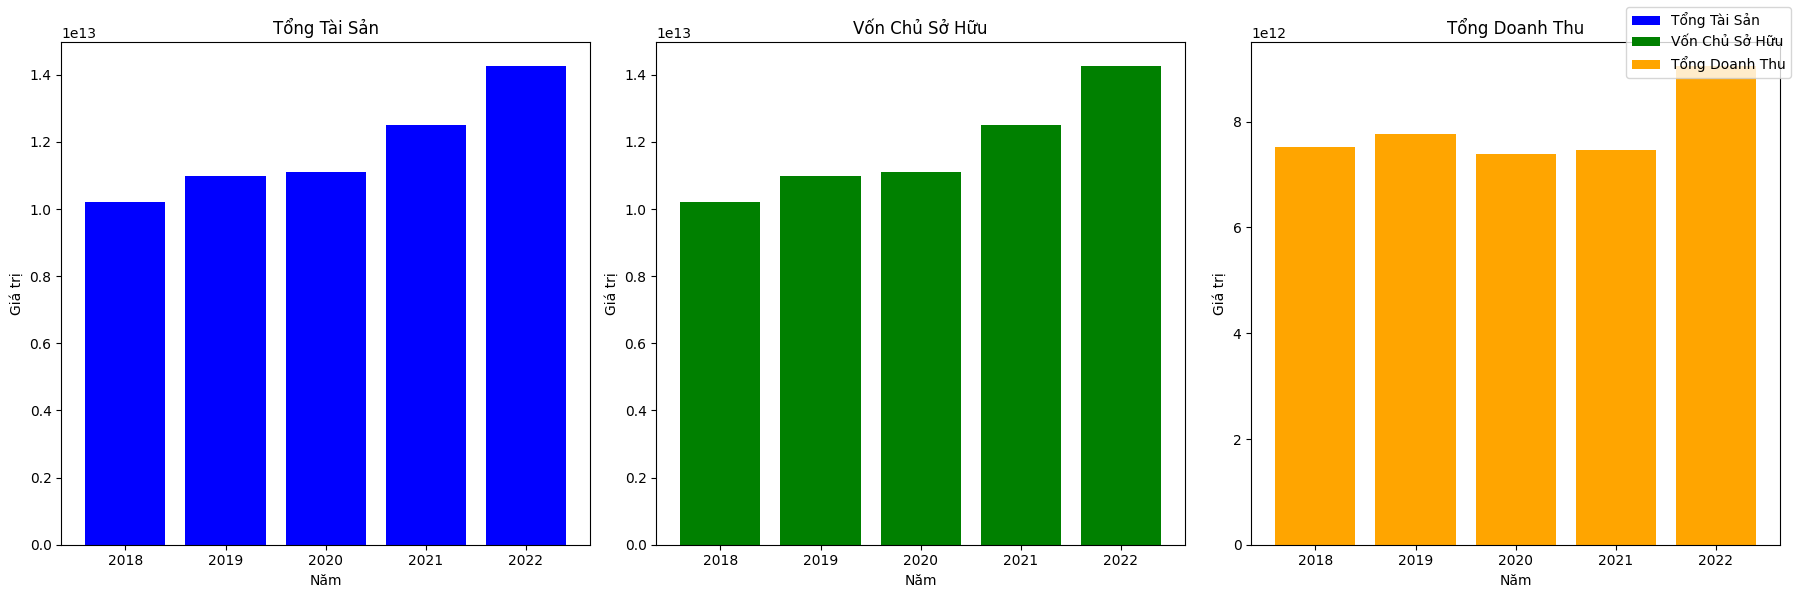

In [43]:
# Tạo subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Biểu đồ cột tổng tài sản
bars1 = ax1.bar(df1['year'], df1['CĐKT. TỔNG CỘNG TÀI SẢN Đơn vị: Triệu VND'], color='blue')
ax1.set_title('Tổng Tài Sản')
ax1.set_xlabel('Năm')
ax1.set_ylabel('Giá trị')

# Biểu đồ cột vốn chủ sở hữu
bars2 = ax2.bar(df1['year'], df1[ 'CĐKT. TỔNG CỘNG NGUỒN VỐN Đơn vị: Triệu VND'], color='green')
ax2.set_title('Vốn Chủ Sở Hữu')
ax2.set_xlabel('Năm')
ax2.set_ylabel('Giá trị')

# Biểu đồ cột tổng doanh thu
bars3 = ax3.bar(df1['year'], df1[ 'KQKD. Doanh thu thuần Đơn vị: Triệu VND'], color='orange')
ax3.set_title('Tổng Doanh Thu')
ax3.set_xlabel('Năm')
ax3.set_ylabel('Giá trị')

# Thêm chú thích và hiển thị legend
fig.legend([bars1, bars2, bars3], ['Tổng Tài Sản', 'Vốn Chủ Sở Hữu', 'Tổng Doanh Thu'], loc='upper right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


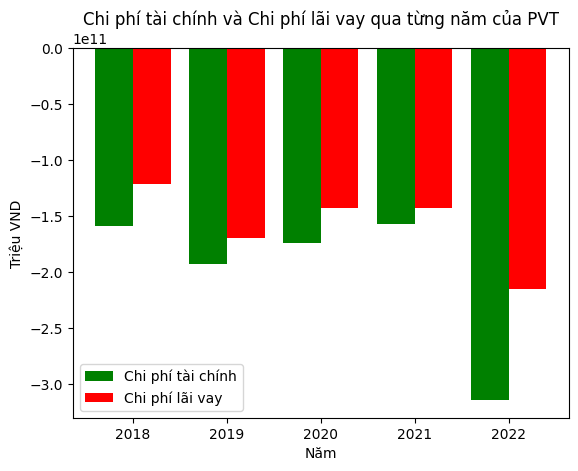

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Chọn cột 'Năm'
years = df1['year'].unique()

# Chọn cột 'KQKD. Chi phí tài chính Đơn vị: Triệu VND'
chi_phi_tai_chinh = df1.groupby('year')['KQKD. Chi phí tài chính Đơn vị: Triệu VND'].sum()

# Chọn cột 'KQKD. Trong đó: Chi phí lãi vay Đơn vị: Triệu VND'
chi_phi_lai_vay = df1.groupby('year')['KQKD. Trong đó: Chi phí lãi vay Đơn vị: Triệu VND'].sum()

# Vẽ biểu đồ cột kế bên nhau
plt.bar(years - 0.2, chi_phi_tai_chinh, width=0.4, label='Chi phí tài chính', align='center', color='green')
plt.bar(years + 0.2, chi_phi_lai_vay, width=0.4, label='Chi phí lãi vay', align='center', color='red')

# Đặt tên cho trục x và trục y
plt.xlabel('Năm')
plt.ylabel('Triệu VND')

# Đặt tiêu đề cho biểu đồ
plt.title('Chi phí tài chính và Chi phí lãi vay qua từng năm của PVT')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


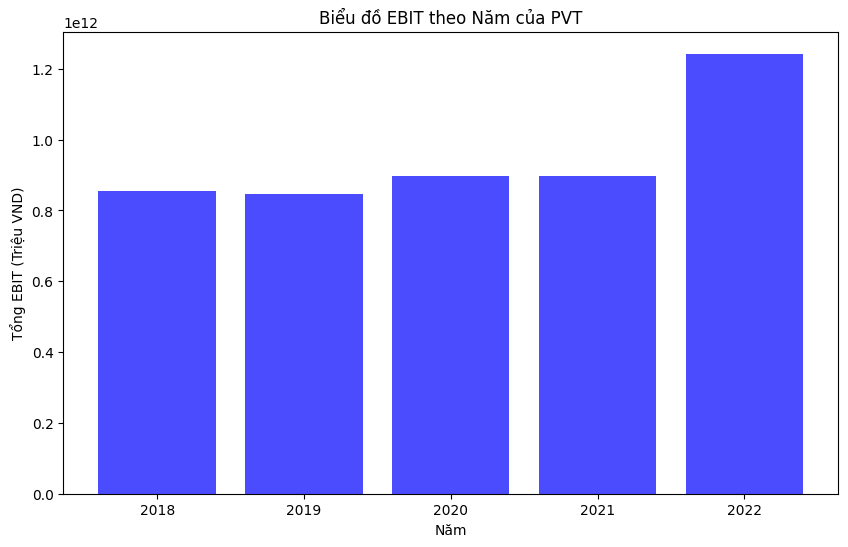

In [45]:

# Chuyển cột 'dbYear' thành kiểu số nguyên 
df1['year'] = pd.to_numeric(df1['year'], errors='coerce')

# Tính EBIT
df1['EBIT'] = df1['KQKD. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND'] + \
             df1['KQKD. Trong đó: Chi phí lãi vay Đơn vị: Triệu VND']
# Vẽ biểu đồ cho EBIT theo Năm
plt.figure(figsize=(10, 6))
plt.bar(df1['year'], df1['EBIT'], color='blue', alpha=0.7)
plt.title('Biểu đồ EBIT theo Năm của PVT')
plt.xlabel('Năm')
plt.ylabel('Tổng EBIT (Triệu VND)')
plt.show()

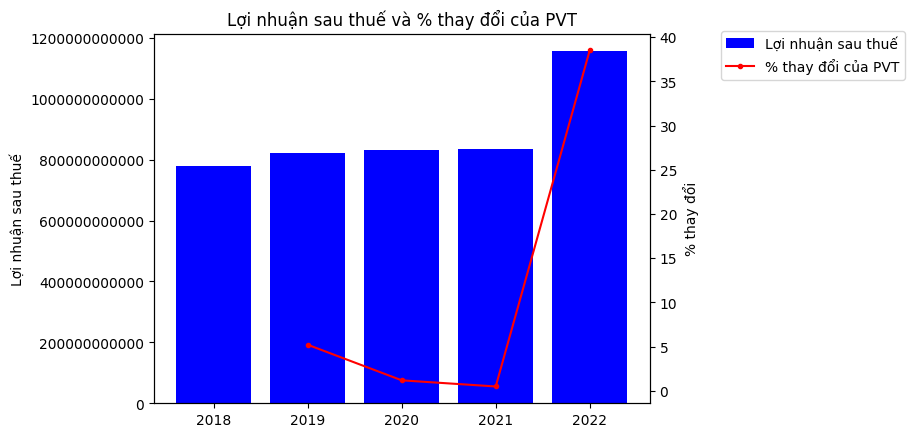

In [46]:

from matplotlib.ticker import FuncFormatter
# Định nghĩa hàm format_y_axis
def format_y_axis(value, _):
    return f'{value:.0f}'

#Tính toán
df1['PhanTramThayDoi'] = df1['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'].pct_change() * 100
selected_columns = df1[['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND', 'year', 'PhanTramThayDoi']]

#Vẽ biểu đồ
fig, ax1 = plt.subplots()
# Vẽ biểu đồ cột cho lợi nhuận sau thuế
bar_plot = ax1.bar(selected_columns['year'], selected_columns['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'], color='b', label='Lợi nhuận sau thuế')
# Đặt trục y1 cho biểu đồ cột
ax1.set_ylabel('Lợi nhuận sau thuế')
ax1.tick_params(axis='y')
# Tạo trục y2 cho đường phần trăm thay đổi
ax2 = ax1.twinx()
line_plot = ax2.plot(selected_columns['year'], selected_columns['PhanTramThayDoi'], 'r.-', label='Phần trăm thay đổi')[0]
# Đặt trục y2 cho đường phần trăm thay đổi
ax2.set_ylabel('% thay đổi')
ax2.tick_params(axis='y')
ax1.yaxis.set_major_formatter(FuncFormatter(format_y_axis))
ax1.tick_params(axis='x', rotation=0)

# Thiết lập nhãn và tiêu đề
plt.xlabel('Năm')
plt.title('Lợi nhuận sau thuế và % thay đổi của PVT')
fig.legend([bar_plot, line_plot], ['Lợi nhuận sau thuế', '% thay đổi của PVT'], loc='upper left', bbox_to_anchor=(1, 0.9))
plt.show()

#### Các công ty cùng ngành

In [47]:

ktcl = ['VTO', 'PVT', 'PJT', 'VIP']
#2018

CN2018 = bctc2018[bctc2018['Mã'].str.contains('|'.join(ktcl), na=False)]

# Trích xuất phần text giữa "VT:" và "(P)"
CN2018['Name'] = CN2018['Mã'].str.extract(r'VT:(.*?)\(P\)')

#2019

CN2019 = bctc2019[bctc2019['Mã'].str.contains('|'.join(ktcl), na=False)]

# Trích xuất phần text giữa "VT:" và "(P)"
CN2019['Name'] = CN2019['Mã'].str.extract(r'VT:(.*?)\(P\)')

#2020
CN2020 = bctc2020[bctc2020['Mã'].str.contains('|'.join(ktcl), na=False)]

# Trích xuất phần text giữa "VT:" và "(P)"
CN2020['Name'] = CN2020['Mã'].str.extract(r'VT:(.*?)\(P\)')

#2021
CN2021 = bctc2021[bctc2021['Mã'].str.contains('|'.join(ktcl), na=False)]

# Trích xuất phần text giữa "VT:" và "(P)"
CN2021['Name'] = CN2021['Mã'].str.extract(r'VT:(.*?)\(P\)')


#2022

CN2022 = bctc2022[bctc2022['Mã'].str.contains('|'.join(ktcl), na=False)]

# Trích xuất phần text giữa "VT:" và "(P)"
CN2022['Name'] = CN2022['Mã'].str.extract(r'VT:(.*?)\(P\)')


CN= pd.concat([CN2018, CN2019, CN2020, CN2021, CN2022])
CN = CN.rename(columns={'Năm ': 'year'})
CN




C:\Users\ASUS\AppData\Local\Temp\ipykernel_12732\1682700482.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12732\1682700482.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12732\1682700482.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,year,Trạng thái kiểm toán,...,"TM. Chi phí nguyên liệu, vật liệu Đơn vị: Triệu VND",TM. Chi phí nhân công Đơn vị: Triệu VND,TM.Chi phí khấu hao tài sản cố định Đơn vị: Triệu VND,TM. Chi phí dịch vụ mua ngoài Đơn vị: Triệu VND,TM. Chi phí khác bằng tiền Đơn vị: Triệu VND,BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND,BCTCKH. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND,Name,fQ
2018,PJT,Vận tải thủy PETROLIMEX,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2018.0,Chưa kiểm toán,...,2.562753e+11,7.065880e+10,4.196905e+10,9.958427e+10,5.206479e+09,5.976960e+11,4.020000e+10,3.216000e+10,NaN,NaN
2018,PVT,Vận tải Dầu khí PVTrans,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2018.0,Chưa kiểm toán,...,8.463357e+11,5.662059e+11,5.995267e+11,2.177657e+12,2.799530e+11,5.500000e+12,5.000000e+11,4.000000e+11,NaN,NaN
2018,VIP,Vận tải Xăng dầu VIPCO,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2018.0,Chưa kiểm toán,...,4.168177e+10,1.189897e+11,1.776456e+11,7.153189e+10,3.854308e+11,7.248355e+11,4.006140e+10,3.204912e+10,NaN,NaN
2018,VTO,VITACO,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2018.0,Chưa kiểm toán,...,2.148386e+11,1.646647e+11,3.261497e+11,1.584968e+11,1.207592e+11,1.429988e+12,1.107990e+11,8.863920e+10,NaN,NaN
2019,PJT,Vận tải thủy PETROLIMEX,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2019.0,Chưa kiểm toán,...,2.439295e+11,6.994261e+10,4.368345e+10,9.404245e+10,5.093445e+09,6.690910e+11,3.060000e+10,2.448000e+10,NaN,NaN
2019,PVT,Vận tải Dầu khí PVTrans,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2019.0,Chưa kiểm toán,...,1.371134e+12,6.530470e+11,7.497222e+11,1.308305e+12,8.904860e+11,6.200000e+12,5.500000e+11,4.330000e+11,NaN,NaN
2019,VIP,Vận tải Xăng dầu VIPCO,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2019.0,Chưa kiểm toán,...,6.521637e+10,1.110188e+11,1.563348e+11,6.915305e+10,1.693352e+11,5.883099e+11,6.804432e+10,5.443546e+10,NaN,NaN
2019,VTO,VITACO,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2019.0,Chưa kiểm toán,...,2.419895e+11,1.796809e+11,2.435627e+11,1.309938e+11,1.386949e+11,1.131000e+12,7.000000e+10,5.600000e+10,NaN,NaN
2020,PJT,Vận tải thủy PETROLIMEX,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2020.0,Chưa kiểm toán,...,2.442083e+11,7.679384e+10,5.731671e+10,1.062197e+11,7.774184e+09,6.922900e+11,3.150000e+10,2.520000e+10,NaN,NaN
2020,PVT,Vận tải Dầu khí PVTrans,HOSE,Công nghiệp,Hàng & Dịch vụ Công nghiệp,Vận tải,Vận tải Thủy,5.0,2020.0,Chưa kiểm toán,...,1.422793e+12,8.066751e+11,8.772871e+11,1.475754e+12,8.127045e+11,6.000000e+12,5.000000e+11,4.040000e+11,NaN,NaN


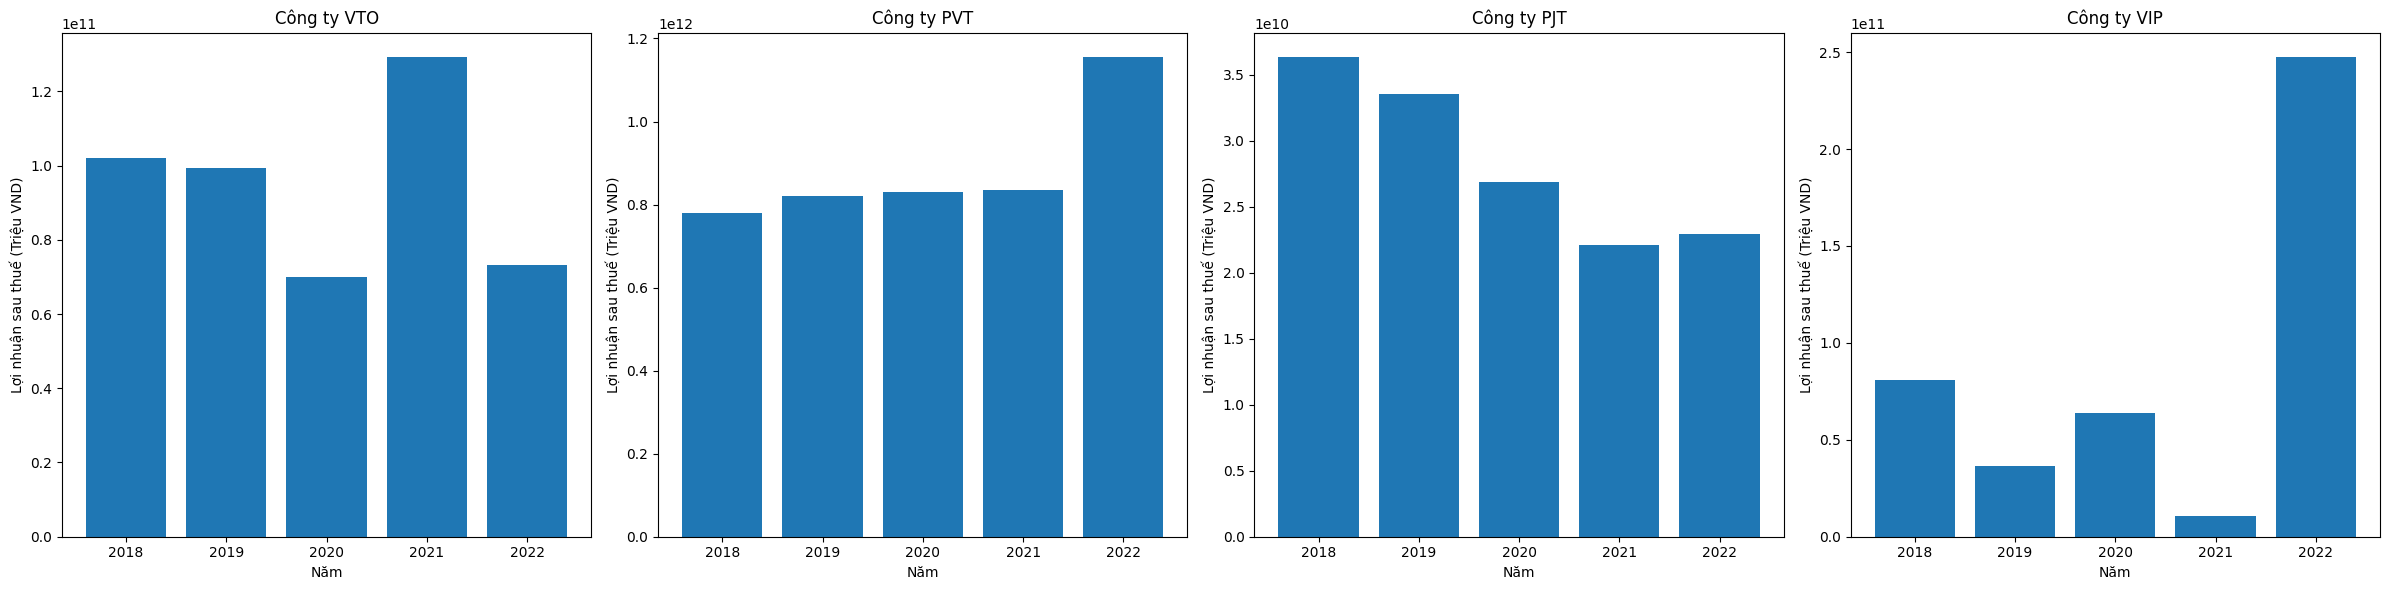

In [48]:


CN_filtered = CN.copy()

# Danh sách các mã chứng khoán
ktcl = ['VTO', 'PVT', 'PJT', 'VIP']

# Tạo một figure và axes cho mỗi năm
fig, axes = plt.subplots(ncols=len(ktcl), figsize=(6 * len(ktcl), 6))

# Vẽ biểu đồ cột cho từng mã chứng khoán
for i, name in enumerate(ktcl):
    ax = axes[i]  # Chọn một subplot tương ứng
    data = CN_filtered[CN_filtered['Mã'] == name]  # Lọc dữ liệu cho mã chứng khoán hiện tại
    ax.bar(data['year'], data['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'])
    ax.set_ylabel('Lợi nhuận sau thuế (Triệu VND)')
    ax.set_xlabel('Năm')
    ax.set_title(f'Công ty {name}')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [49]:
chi_so_tai_chinh = pd.read_excel("VietstockFinance_PVT.xlsx",header=0)
columns = chi_so_tai_chinh.columns.tolist()
columns[0] = 'year'
chi_so_tai_chinh.columns = columns
cstc = chi_so_tai_chinh.transpose()
cstc.dropna(axis=1, inplace=True)
tieu_de = cstc.iloc[0]
cstc.columns = tieu_de
cstc_PVT = cstc.iloc[1:]
cstc_PVT.columns.name = None 
# Loại bỏ tên cột không mong muốn
cstc_PVT.reset_index(inplace=True)  
# Chuyển tên index thành cột mới
cstc_PVT.columns.name = None 
# Loại bỏ tên cột không mong muốn
cstc_PVT.columns = ['year'] + cstc_PVT.columns[1:].tolist() 
# Đặt lại tên cột đầu tiên thành 'year'
cstc_PVT

,year,Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS),Giá trị sổ sách của cổ phiếu (BVPS),Chỉ số giá thị trường trên thu nhập (P/E),Chỉ số giá thị trường trên giá trị sổ sách (P/B),Chỉ số giá thị trường trên doanh thu thuần (P/S),Tỷ suất cổ tức,Beta,Giá trị doanh nghiệp trên lợi nhuận trước thuế và lãi vay (EV/EBIT),"Giá trị doanh nghiệp trên lợi nhuận trước thuế, khấu hao và lãi vay (EV/EBITDA)",...,Tài sản ngắn hạn/Tổng tài sản,Tiền/Tài sản ngắn hạn,Đầu tư tài chính ngắn hạn/Tài sản ngắn hạn,Phải thu ngắn hạn/Tài sản ngắn hạn,Hàng tồn kho/Tài sản ngắn hạn,Tài sản ngắn hạn khác/Tài sản ngắn hạn,Tài sản dài hạn/Tổng tài sản,Tài sản cố định/Tổng tài sản,Tài sản cố định hữu hình/Tài sản cố định,XDCBDD/Tài sản cố định
0,2018,2316.99,18261.64,6.78,0.86,0.59,6.0,0.7,6.61,4.27,...,41.65,30.08,37.0,25.6,3.56,3.75,58.35,55.16,99.92,0.01
1,2019,2450.29,20220.87,6.86,0.83,0.61,6.0,0.57,6.97,4.27,...,34.92,31.45,38.5,22.52,3.31,4.22,65.08,61.66,99.95,0.0
2,2020,2354.95,19400.17,5.94,0.72,0.61,3.0,1.26,5.97,3.42,...,42.04,31.59,39.75,23.67,2.41,2.58,57.96,52.84,99.97,2.66
3,2021,2038.48,21514.51,11.82,1.12,1.05,4.0,1.41,9.75,5.46,...,38.82,26.46,36.9,30.45,2.93,3.26,61.18,55.84,99.99,0.02
4,2022,2648.96,24761.4,8.31,0.89,0.79,0.0,1.35,6.6,3.85,...,44.11,28.53,43.06,21.9,2.85,3.65,55.89,50.94,100.0,0.3


## import thêm file chỉ số tài chính của PVT

In [50]:
cstc_PVT = cstc_PVT.apply(pd.to_numeric, errors='coerce')
cstc_PVT.dtypes

year                                                     int64
 Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)    float64
 Giá trị sổ sách của cổ phiếu (BVPS)                   float64
 Chỉ số giá thị trường trên thu nhập (P/E)             float64
 Chỉ số giá thị trường trên giá trị sổ sách (P/B)      float64
                                                        ...   
 Tài sản ngắn hạn khác/Tài sản ngắn hạn                float64
 Tài sản dài hạn/Tổng tài sản                          float64
 Tài sản cố định/Tổng tài sản                          float64
 Tài sản cố định hữu hình/Tài sản cố định              float64
 XDCBDD/Tài sản cố định                                float64
Length: 68, dtype: object

In [51]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


years = cstc_PVT['year']
eps = cstc_PVT[' Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)']
PE = cstc_PVT[' Chỉ số giá thị trường trên thu nhập (P/E)']

# Tạo subplot với trục chính và trục phụ
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Thêm cột cho eps
fig.add_trace(go.Bar(x=years, y=eps, name='EPS', marker_color='blue'), secondary_y=False)

# Thêm đường cho PE trên trục phụ
fig.add_trace(go.Scatter(x=years, y=PE, mode='lines+markers', name='P/E', line=dict(color='orange')),
              secondary_y=True)

# Tùy chỉnh layout
fig.update_layout(
    title='Chỉ số định giá P/E của PVT',
    xaxis_title='Năm',
    yaxis_title='Thu nhập trên mỗi cổ phần (EPS)',
    hovermode='x',  # Tương tác khi di chuyển chuột theo chiều ngang
    hoverlabel=dict(bgcolor='white', font_size=12),  # Tùy chỉnh giao diện tooltip
)

# Hiển thị biểu đồ
fig.show()


In [52]:
import plotly.graph_objects as go

cstc_PVT['year'] = cstc_PVT['year'].astype(int)

# Tạo biểu đồ với plotly
fig = go.Figure()

# Thêm dữ liệu vào biểu đồ
fig.add_trace(go.Scatter(x=cstc_PVT['year'], 
                         y=cstc_PVT[' Giá trị doanh nghiệp trên lợi nhuận trước thuế, khấu hao và lãi vay (EV/EBITDA)'], 
                         mode='lines', 
                         name='Giá'))

# Đặt tiêu đề và nhãn trục
fig.update_layout(title='Biểu đồ Định giá EV/EBITDA - PVT', 
                  xaxis_title='Năm', 
                  yaxis_title='Giá')

# Định dạng trục x để hiển thị số nguyên
fig.update_xaxes(type='category')

# Hiển thị biểu đồ
fig.show()


In [53]:
import plotly.graph_objects as go

cstc_PVT['year'] = cstc_PVT['year'].astype(int)
years = cstc_PVT['year']
roea = cstc_PVT[' Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân (ROEA)']
roaa = cstc_PVT[' Tỷ suất sinh lợi trên tổng tài sản bình quân (ROAA)']

# Tạo biểu đồ đường cho ROEA và ROAA
fig = go.Figure()

# Thêm đường cho ROEA
fig.add_trace(go.Scatter(x=years, y=roea, mode='lines+markers', name='ROEA', line=dict(color='blue')))

# Thêm đường cho ROAA
fig.add_trace(go.Scatter(x=years, y=roaa, mode='lines+markers', name='ROAA', line=dict(color='orange')))

# Tùy chỉnh layout
fig.update_layout(
    title='So sánh ROE và ROA qua các năm của PVT',
    xaxis_title='Năm',
    yaxis_title='Tỷ suất lợi nhuận',
    hovermode='x',  # Tương tác khi di chuyển chuột theo chiều ngang
    hoverlabel=dict(bgcolor='white', font_size=12),  # Tùy chỉnh giao diện tooltip
)

# Định dạng số trong tooltip thành số nguyên
fig.update_traces(hoverinfo='text', hovertext=[f'{val:.0f}' for val in roea])

# Hiển thị biểu đồ
fig.show()
